# Data Visualization Exercises
## Seaborn (20 questions) & Plotly (5 questions)

**Instructions:**
- Each question is followed by an empty cell for your answer.
- Write both **code and interpretation**.
- Dataset used: `tips` (Seaborn).


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

tips = sns.load_dataset("tips")

### Seaborn – Question 1
Display the first 5 rows of the `tips` dataset and briefly describe its structure.

In [2]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Seaborn – Question 2
Create a histogram of `total_bill`. Justify the number of bins chosen.

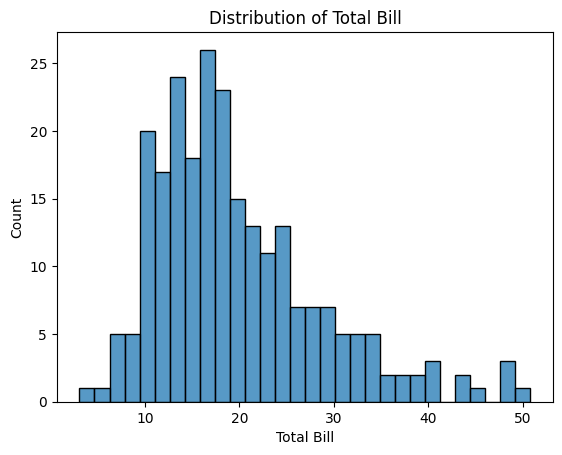

In [4]:
plt.figure()
sns.histplot(
    data=tips,
    x="total_bill",
    bins=30,
    kde=False
)

plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Count")
plt.show()

In [3]:
history = px.histogram(tips, x="total_bill", nbins=30, title="Distribution of Total Bill")
history.show()

30 bins est un choix par défaut raisonnable, mais le bon nombre dépend : de la taille des données, de la variabilité, de l’objectif (exploration, rapport, modélisation)

### Seaborn – Question 3
Compare the distribution of `tip` with and without KDE.

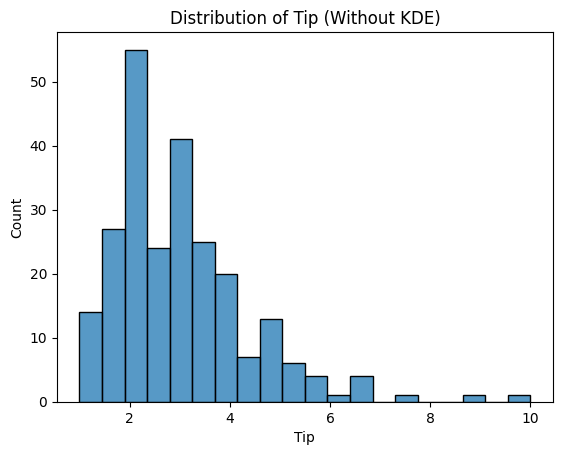

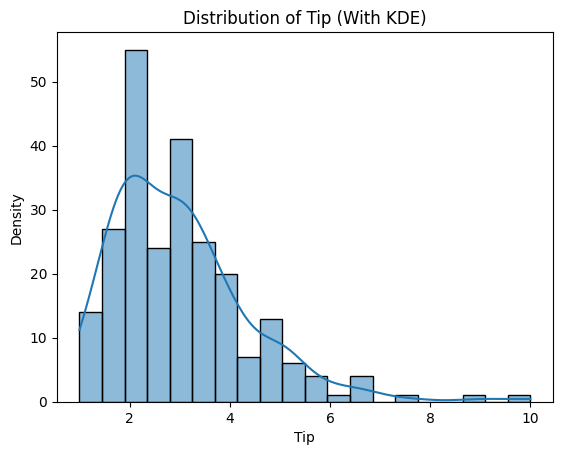

In [5]:
# Histogramme sans KDE
plt.figure()
sns.histplot(data=tips, x="tip", bins=20, kde=False)
plt.title("Distribution of Tip (Without KDE)")
plt.xlabel("Tip")
plt.ylabel("Count")
plt.show()

# Histogramme avec KDE
plt.figure()
sns.histplot(data=tips, x="tip", bins=20, kde=True)
plt.title("Distribution of Tip (With KDE)")
plt.xlabel("Tip")
plt.ylabel("Density")
plt.show()


### Seaborn – Question 4
Create a boxplot of `total_bill` by day and interpret the differences.

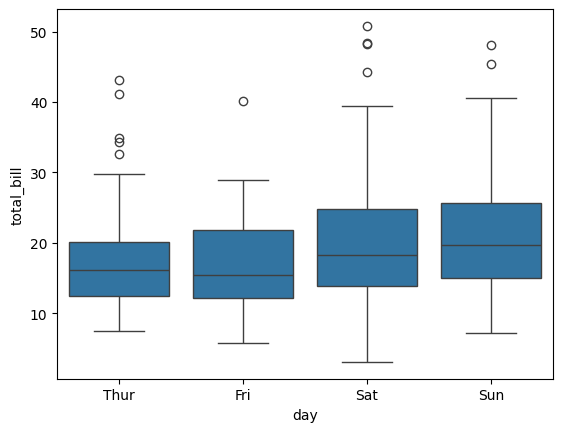

In [10]:

sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

### Seaborn – Question 5
Visualize the relationship between `total_bill` and `tip` with a regression line.

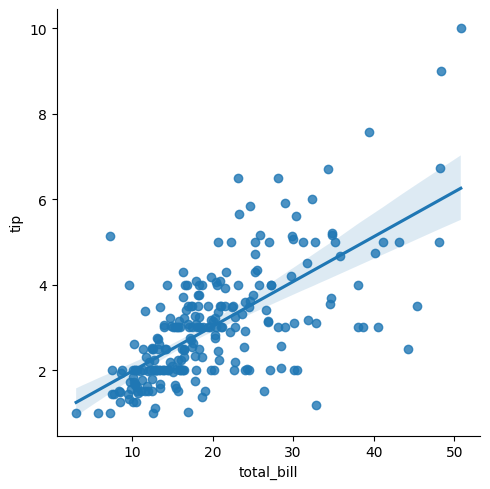

In [11]:
sns.lmplot(x="total_bill", y="tip", data=tips)

### Seaborn – Question 6
Visualize `total_bill` vs `tip`, distinguishing smokers and non-smokers.

<Axes: xlabel='day', ylabel='total_bill'>

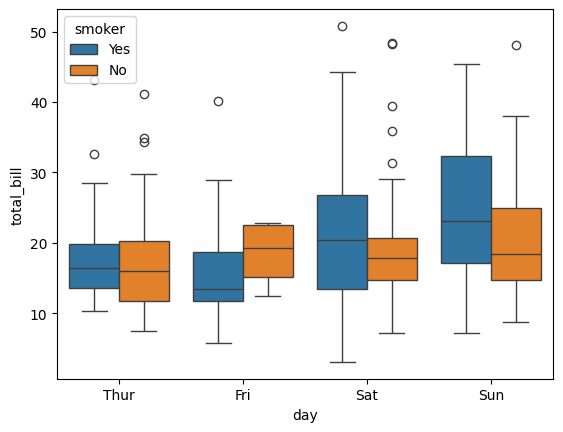

In [12]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

### Seaborn – Question 7
Create a violin plot of `tip` by sex.

<Axes: xlabel='sex', ylabel='total_bill'>

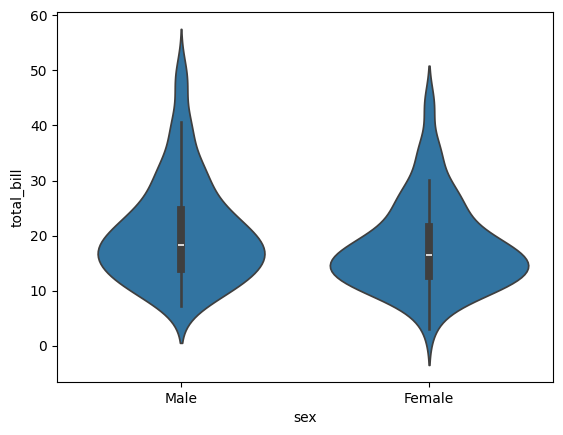

In [13]:
sns.violinplot(x="sex", y="total_bill", data=tips)

### Seaborn – Question 8
Compare the average tip per day using a barplot.

<Axes: xlabel='day', ylabel='tip'>

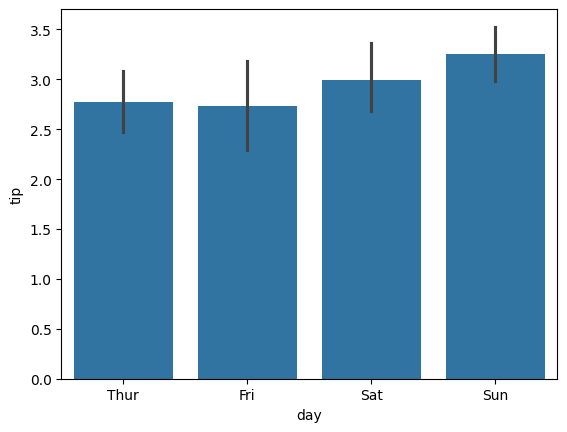

In [14]:
sns.barplot(x="day", y="tip", data=tips)

### Seaborn – Question 9
Create a countplot of the `day` variable. What does it represent?

<Axes: xlabel='day', ylabel='count'>

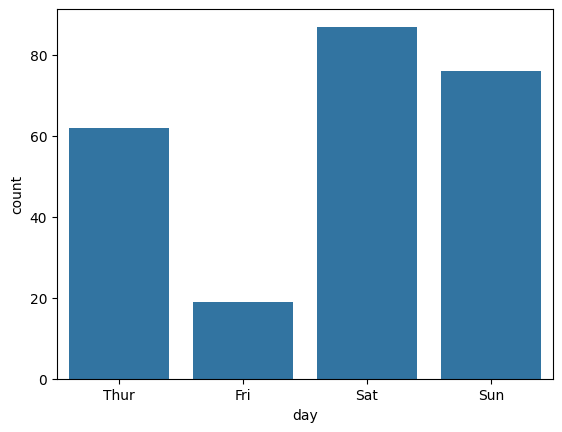

In [15]:
sns.countplot(x="day", data=tips)

### Seaborn – Question 10
Create a boxplot of `tip` by day and sex.

<Axes: xlabel='sex', ylabel='tip'>

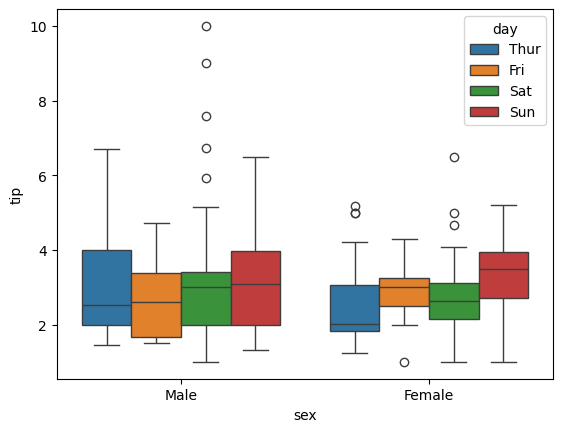

In [16]:
sns.boxplot(x="sex", y="tip", hue="day", data=tips)

### Seaborn – Question 11
Create a scatter plot faceted by day.

<Axes: xlabel='day', ylabel='tip'>

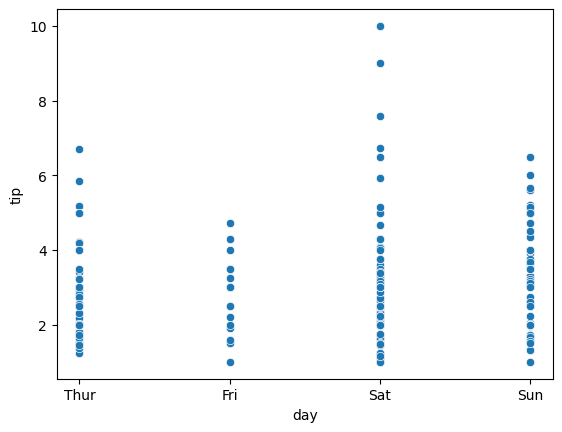

In [18]:
sns.scatterplot(x="day", y="tip", data=tips)

### Seaborn – Question 12
Create a pairplot of the numerical variables.

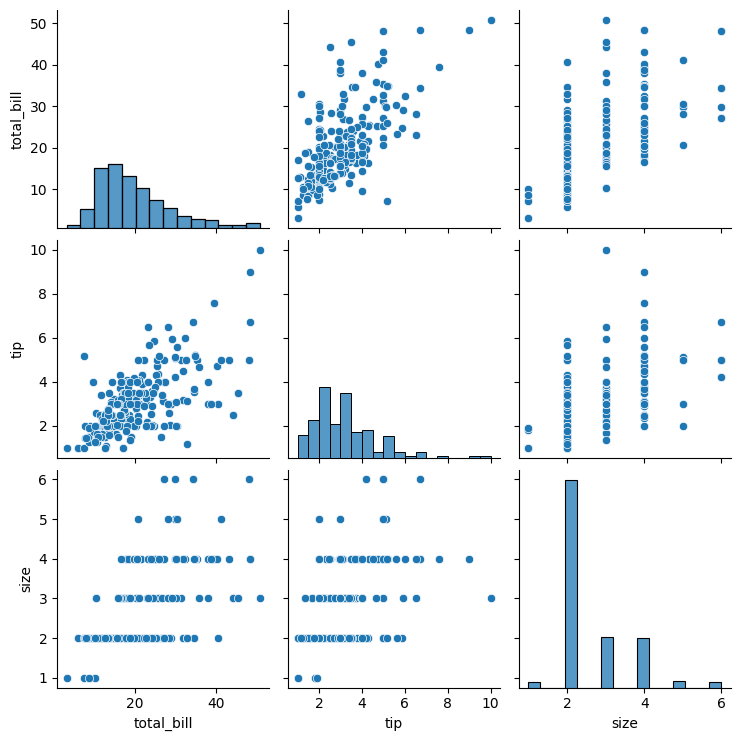

In [ ]:
sns.pairplot(tips)

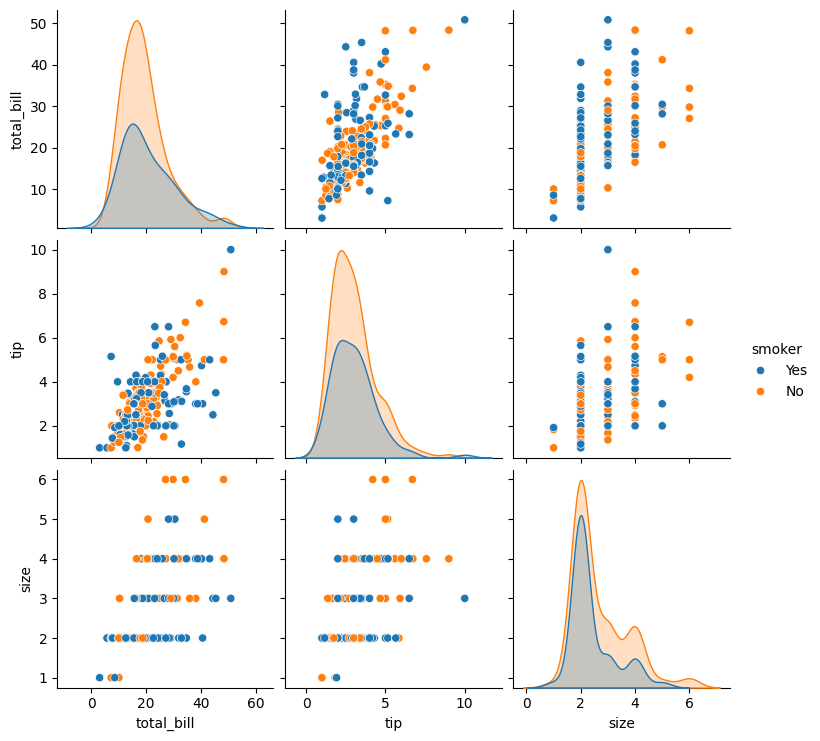

In [21]:
sns.pairplot(tips, hue="smoker")

### Seaborn – Question 13
Create a heatmap of the correlation matrix.

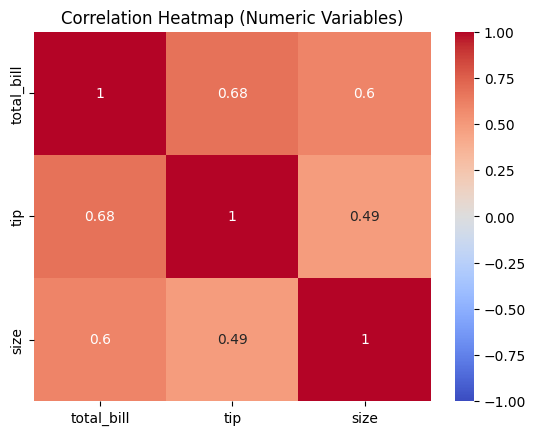

In [25]:
corr = tips.select_dtypes(include="number").corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


### Seaborn – Question 14
Compare the distribution of `total_bill` by time (Lunch vs Dinner).

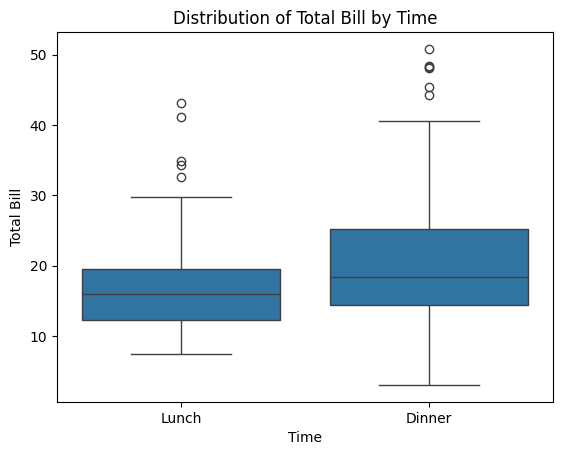

In [26]:
plt.figure()
sns.boxplot(data=tips, x="time", y="total_bill")
plt.title("Distribution of Total Bill by Time")
plt.xlabel("Time")
plt.ylabel("Total Bill")
plt.show()

### Seaborn – Question 15
Create a stripplot of `tip` by day. What do you observe?

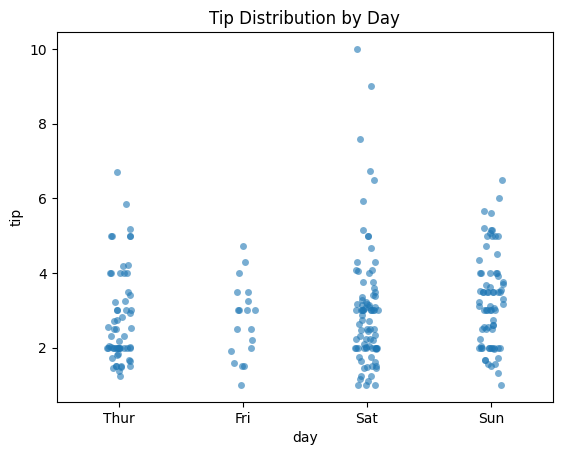

In [27]:
plt.figure()
sns.stripplot(data=tips, x="day", y="tip", jitter=True, alpha=0.6)
plt.title("Tip Distribution by Day")
plt.show()

### Seaborn – Question 16
Create a swarmplot and explain the difference with a stripplot.

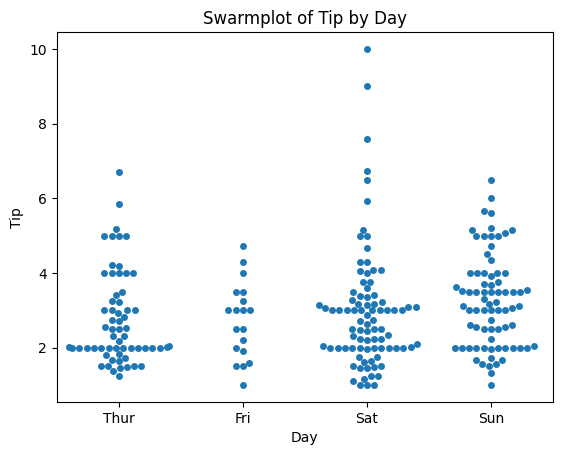

In [28]:
plt.figure()
sns.swarmplot(data=tips, x="day", y="tip")
plt.title("Swarmplot of Tip by Day")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.show()

### Seaborn – Question 17
Create a categorical plot combining day, sex, and tip.

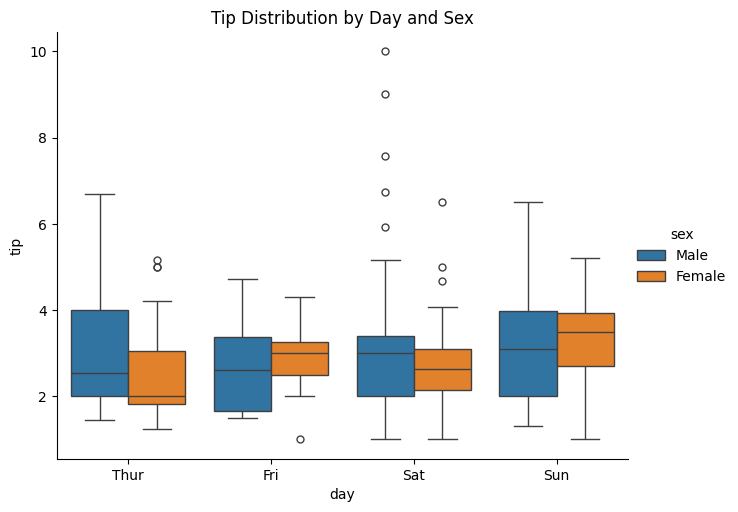

In [29]:
sns.catplot(
    data=tips,
    x="day",
    y="tip",
    hue="sex",
    kind="box",
    height=5,
    aspect=1.3
)

plt.title("Tip Distribution by Day and Sex")
plt.show()

### Seaborn – Question 18
Create a new variable representing tip percentage (`tip / total_bill`).

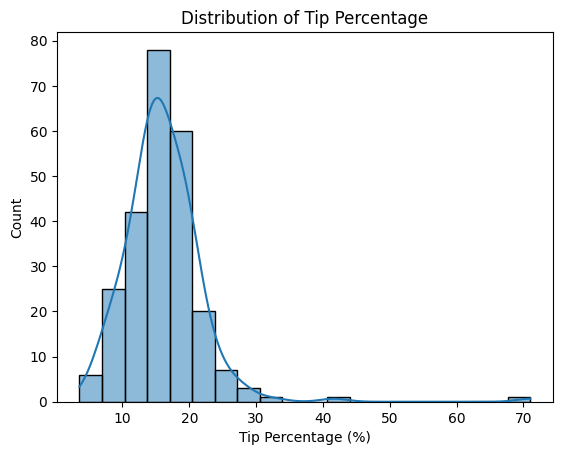

In [31]:
tips["tip_percentage"] = 100 * tips["tip"] / tips["total_bill"]
plt.figure()
sns.histplot(tips["tip_percentage"], bins=20, kde=True)
plt.title("Distribution of Tip Percentage")
plt.xlabel("Tip Percentage (%)")
plt.show()


### Seaborn – Question 19
Compare tip percentage distributions across days.

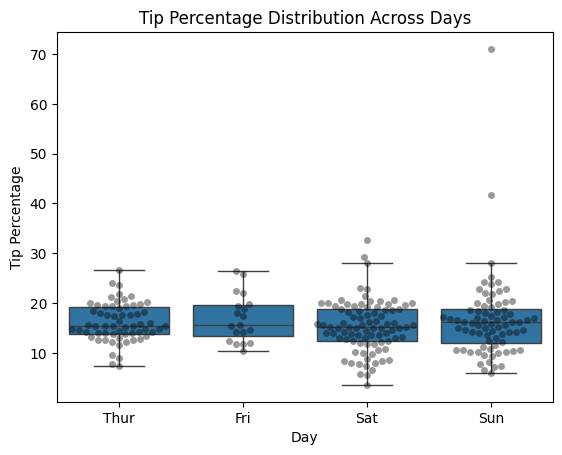

In [32]:
plt.figure()
sns.boxplot(data=tips, x="day", y="tip_percentage", showfliers=False)
sns.swarmplot(data=tips, x="day", y="tip_percentage", color="black", alpha=0.4)
plt.title("Tip Percentage Distribution Across Days")
plt.xlabel("Day")
plt.ylabel("Tip Percentage")
plt.show()

### Seaborn – Question 20
Propose a relevant visualization not used previously and justify it.

C:\Users\tsats\AppData\Local\Temp\ipykernel_35188\1284423841.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



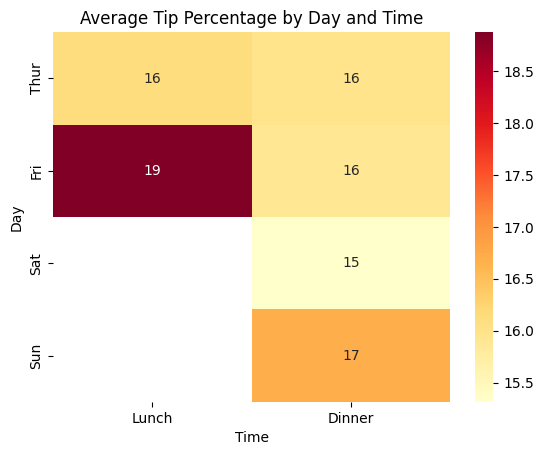

In [33]:
pivot = tips.pivot_table(
    values="tip_percentage",
    index="day",
    columns="time",
    aggfunc="mean"
)

plt.figure()
sns.heatmap(pivot, annot=True, cmap="YlOrRd")
plt.title("Average Tip Percentage by Day and Time")
plt.xlabel("Time")
plt.ylabel("Day")
plt.show()


## Plotly – Question 21
Create an interactive scatter plot of `total_bill` vs `tip`.

In [35]:
fig = px.scatter(
    tips,
    x="total_bill",
    y="tip",
    title="Total Bill vs Tip",
    labels={"total_bill": "Total Bill", "tip": "Tip"},
    hover_data=["sex", "day", "time", "size"]
)

fig.show()

## Plotly – Question 22
Create an interactive boxplot of `tip` by day.

In [36]:
fig = px.box(
    tips,
    x="day",
    y="tip",
    title="Tip Distribution by Day",
    labels={"day": "Day", "tip": "Tip"},
    points="all"   # affiche les points individuels
)

fig.show()


## Plotly – Question 23
Create an interactive histogram of `total_bill` colored by sex.

In [37]:
fig = px.histogram(
    tips,
    x="total_bill",
    color="sex",
    nbins=30,
    barmode="overlay",
    opacity=0.7,
    title="Distribution of Total Bill by Sex",
    labels={"total_bill": "Total Bill", "sex": "Sex"}
)

fig.show()


## Plotly – Question 24
Create an interactive plot showing average tip per day.

In [38]:
avg_tip_day = tips.groupby("day", as_index=False)["tip"].mean()

fig = px.bar(
    avg_tip_day,
    x="day",
    y="tip",
    title="Average Tip per Day",
    labels={"day": "Day", "tip": "Average Tip"},
    text_auto=".2f"
)

fig.show()

C:\Users\tsats\AppData\Local\Temp\ipykernel_35188\3915683622.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Plotly – Question 25
Create a free Plotly visualization and justify its usefulness.

In [39]:
fig = px.scatter(
    tips,
    x="total_bill",
    y="tip",
    color="day",
    size="size",
    title="Total Bill vs Tip by Day and Table Size",
    labels={"total_bill": "Total Bill", "tip": "Tip"},
    hover_data=["sex", "time"]
)

fig.show()
